# 신경망 학습
### 신경망은 머신러닝과 달리 좋은 특성을 넣어 줄 필요 없이 데이터 부터 결과를 낼때까지과정에 사람의 개입이 필요하지 않음

# cross entropy

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C:\Users\hjhhi\AppData\Local\Temp/ipykernel_10768/3580895328.py:7: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x), 'b-', label='Natural Logarithm(ln)')
C:\Users\hjhhi\AppData\Local\Temp/ipykernel_10768/3580895328.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.plot(x, np.log10(x), 'r-', label='Common Logarithm(log10)')


Text(0.5, 1.0, 'Natural log(2.718~)and common log graph')

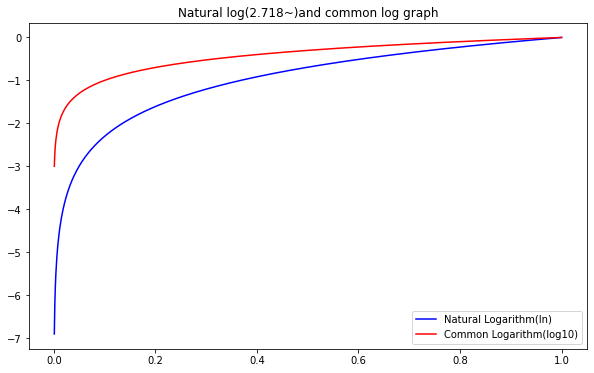

In [64]:
### SSE(MSE에서 1/m나누는 과정만 제외한 함수)와 크로스 엔트로피를 비용함수로 주로 사용한다고함
x = np.linspace(start=0, stop=1.0, num=1000)

plt.figure(figsize=(10, 6)) # 크기 지정

# 자연로그(Natural Logarithm) Y값 생성 
plt.plot(x, np.log(x), 'b-', label='Natural Logarithm(ln)')

# 상용로그(Common Logarithm) Y값 생성 
plt.plot(x, np.log10(x), 'r-', label='Common Logarithm(log10)')

plt.legend() # 범례출력
plt.title("Natural log(2.718~)and common log graph")

### 손실함수 이므로 클래스에 속할 확률이 낮을수록 작아지는 값을 다시 양수로 전환하여 사용해야함
### RMSE랑 다른점이라면 지수함수를 사용해서 확률이 극도로 낮을수록 높은 비용함수를 반환한다는점?

In [65]:
### delta는 0이되어 무한에 닿는걸 막기위한 용도
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

### 원핫인코딩된 라벨값에 속할 확률이 낮을수록 높은 값이 반환되도록 만들어져있음

In [66]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0, 0, 0, 0.05, 0.1, 0.1, 0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0, 0, 0, 0.05, 0.6, 0.1, 0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


In [67]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=True)
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [68]:
### 6만개에서 10개만 뽑아서 손실함수를 대략적으로 파악

train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
y_batch = y_train[batch_mask]

In [69]:
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + 1e-7)) / batch_size

### 굳이 크로스 엔트로피를 쓰는 이유는 정확도와 달리 미분 시 변화값이 계속해서 존재하기 때문에
### 신경망 학습에 유용하기 때문

In [70]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [71]:
def function(x):
    return x[0]**2 + x[1]**2

In [72]:
### x0에 대한 편미분
def function_temp1(x0):
    return x0*x0 + 4.0*2.0
numerical_diff(function_temp1, 3.0)

6.00000000000378

In [73]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val -h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [74]:
print(numerical_gradient(function, np.array([3.0, 4.0])))
print(numerical_gradient(function, np.array([0.0, 2.0])))

[6. 8.]
[0. 4.]


# 경사하강법 

In [75]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [76]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [77]:
### 학습률을 과하게 높히거나 낮을시 전역 최적점을 찾기 어려워지거나 수렴하는데 오래 걸림
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [78]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [79]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [80]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))

t = np.array([0, 0, 1])
net.loss(x, t)

[[ 1.2900206   1.43002508 -0.34523256]
 [ 1.2728246  -0.86326854 -0.30040593]]
[ 1.9195545   0.08107336 -0.47750487]
0


2.6202367078006787

In [81]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.47998247  0.07634545 -0.55632792]
 [ 0.7199737   0.11451817 -0.83449187]]


In [82]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params={}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads={}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])        
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])        
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        
        return grads

In [83]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [84]:
print(net.params["W1"].shape, net.params["b1"].shape, net.params["W2"].shape, net.params["b2"].shape, )

(784, 100) (100,) (100, 10) (10,)


In [85]:
x = np.random.rand(100, 784)
y = net.predict(x)

In [86]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

grads["W1"].shape

(784, 100)

In [93]:
(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iter_num = 10000
train_size = X_train.shape[0]
batch_size = 100
leraning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iter_num):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]
    
grad = network.numerical_gradient(X_batch, y_batch)

for key in ("W1", "b1","W2","b2"):
    network.params[key] -= leraning_rate*grad[key]
    
loss = network.loss(X_batch, y_batch)
train_loss_list.append(loss)

In [106]:
(X_train, y_train), (X_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list=[]



iter_num = 10000
train_size = X_train.shape[0]
batch_size = 100
leraning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iter_per_epoch = max(train_size /  batch_size, 1)

for i in range(iter_num):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    grad = network.numerical_gradient(X_batch, y_batch)

    for key in ("W1", "b1","W2","b2"):
        network.params[key] -= leraning_rate*grad[key]

    loss = network.loss(X_batch, y_batch)
    train_loss_list.append(loss)


    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, y_train)
        test_acc = network.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("Train acc, test acc: " + str(train_acc)+", " + str(test_acc))

Train acc, test acc: 0.09751666666666667, 0.0974


KeyboardInterrupt: 

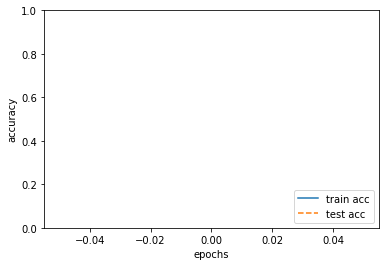

In [107]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
train_loss_list